# Цели исследования

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика —  роанализировать базу 
данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать енностное предложение для нового продукта.

Описание данных

**Таблица books**

Содержит данные о книгах:
- book_id — идентификатор книги;
- author_id — идентификатор автора;
- title — название книги;
- num_pages — количество страниц;
- publication_date — дата публикации книги;
- publisher_id — идентификатор издателя.

**Таблица authors**

Содержит данные об авторах:
- author_id — идентификатор автора;
- author — имя автора.

**Таблица publishers**

Содержит данные об издательствах:
- publisher_id — идентификатор издательства;
- publisher — название издательства;

**Таблица ratings**

Содержит данные о пользовательских оценках книг:
- rating_id — идентификатор оценки;
- book_id — идентификатор книги;
- username — имя пользователя, оставившего оценку;
- rating — оценка книги.

**Таблица reviews**

Содержит данные о пользовательских обзорах на книги:
- review_id — идентификатор обзора;
- book_id — идентификатор книги;
- username — имя пользователя, написавшего обзор;
- text — текст обзора

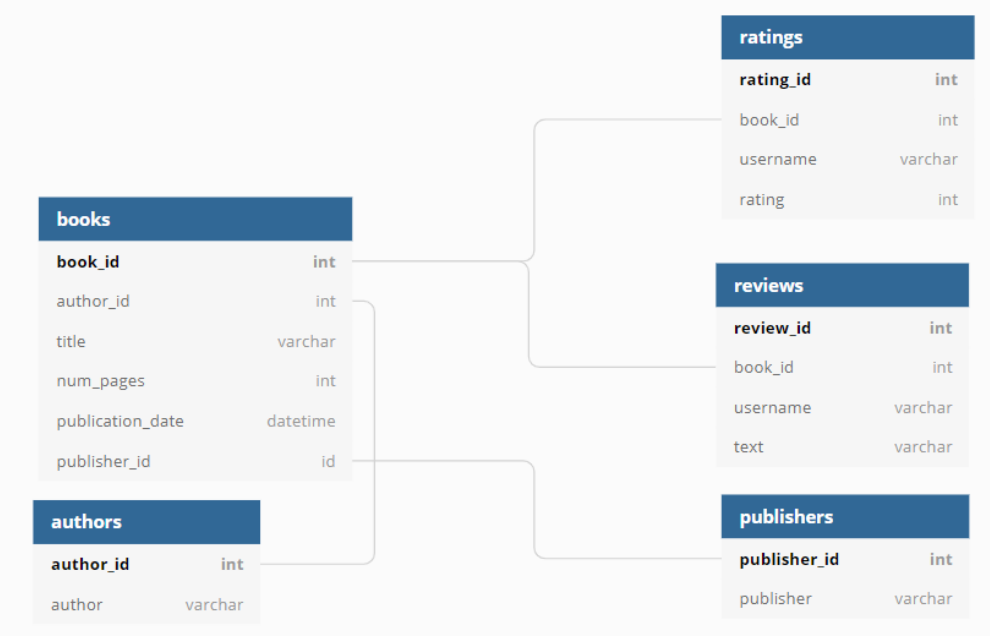

**Задания**

- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

Как выполнить задание?
Опишите цели исследования;
Исследуйте таблицы — выведите первые строки;
Сделайте по одному SQL-запросу для решения каждого задания;
Выведите результат каждого запроса в тетрадке;
SQL 4
Опишите выводы по каждой из решённых задач.

# Импорт библиотек, подключение к базе

In [1]:
import pandas as pd 
from sqlalchemy import create_engine 

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
              'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net', 
             'port': 6432, # порт подключения
               'db': 'data-analyst-final-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'], 
                                                         db_config['pwd'], 
                                                         db_config['host'], 
                                                         db_config['port'], 
                                                         db_config['db']) 
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [3]:
# функция упрощающая запрос
def qr (text):
    return pd.io.sql.read_sql(text, con = engine)

# Изучение базы

In [4]:
qr('''
SELECT *
FROM books
LIMIT 5
''')

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [5]:
qr('''
SELECT *
FROM authors
LIMIT 5
''')

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [6]:
qr('''
SELECT *
FROM publishers
LIMIT 5
''')

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [7]:
qr('''
SELECT *
FROM ratings
LIMIT 5
''')

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [8]:
qr('''
SELECT *
FROM reviews
LIMIT 5
''')

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


# Запросы

## Посчитайте, сколько книг вышло после 1 января 2000 года

In [9]:
qr('''
SELECT count(distinct(book_id))
FROM books
WHERE publication_date>'2000-01-01'
''')

,count
0,819


**После 1 января 2000 года, вышло 819 книг**

## Для каждой книги посчитайте количество обзоров и среднюю оценку

In [10]:
df_1=qr('''
SELECT b.title AS book,
       count(r.review_id) AS review_count,
       round(avg(rt.rating), 2) AS avg_rating
FROM books AS b
LEFT JOIN reviews AS r ON b.book_id=r.book_id
LEFT JOIN ratings AS rt ON b.book_id=rt.book_id
GROUP BY b.title
''')

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
book            999 non-null object
review_count    999 non-null int64
avg_rating      999 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.5+ KB


In [12]:
df_1.head(5)

,book,review_count,avg_rating
0,The Count of Monte Cristo,115,4.22
1,Count Zero (Sprawl #2),4,2.50
2,The Botany of Desire: A Plant's-Eye View of th...,4,3.50
3,The Poisonwood Bible,110,4.36
4,The Canterbury Tales,18,3.33


In [13]:
(print('Всего книг: {} \nМинимальный рейтинг: {} \nМаксимальный рейтинг {}\nМинимальное количество обзоров: {}\nМаксимальное количество обзоров: {} '
       .format(df_1.book.count(),df_1.avg_rating.min(),df_1.avg_rating.max(), df_1.review_count.min(),df_1.review_count.max()))
)

Всего книг: 999 
Минимальный рейтинг: 1.5 
Максимальный рейтинг 5.0
Минимальное количество обзоров: 0
Максимальное количество обзоров: 1120 


**У одной книги нет названия и она  не учлась**

## Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [14]:
qr('''
SELECT p.publisher
FROM books AS b
LEFT JOIN publishers AS p ON b.publisher_id=p.publisher_id
WHERE b.num_pages>50
GROUP BY p.publisher
ORDER BY count(b.book_id) DESC
LIMIT 1
''')

,publisher
0,Penguin Books


**Издательство, которое выпустило наибольшее число книг толще 50 страниц: Penguin Books**

## Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [17]:
qr('''
SELECT author
      ,avg(rt.rating)
FROM books AS b
LEFT JOIN authors AS a ON b.author_id=a.author_id
LEFT JOIN ratings AS rt ON b.book_id=rt.book_id
WHERE b.book_id in
    (SELECT book_id
     FROM ratings
     GROUP BY book_id
     HAVING count(rating_id)>=50)
GROUP BY author
ORDER BY avg(rt.rating) DESC
LIMIT 1
''')

,author,avg
0,J.K. Rowling/Mary GrandPré,4.287097


## Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок

reviews
ratings


In [16]:
qr('''
SELECT avg(COUNT)
FROM
  (SELECT count(r.review_id)
   FROM reviews AS r
   WHERE r.username in
       (SELECT username
        FROM ratings
        GROUP BY username
        HAVING count(rating_id)>50)
   GROUP BY r.username) AS t
''')

,avg
0,24.333333
